In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [39]:
heart = pd.read_csv('heart_failure.csv')

In [40]:
heart.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [41]:
heart.shape

(299, 13)

In [42]:
heart['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [43]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


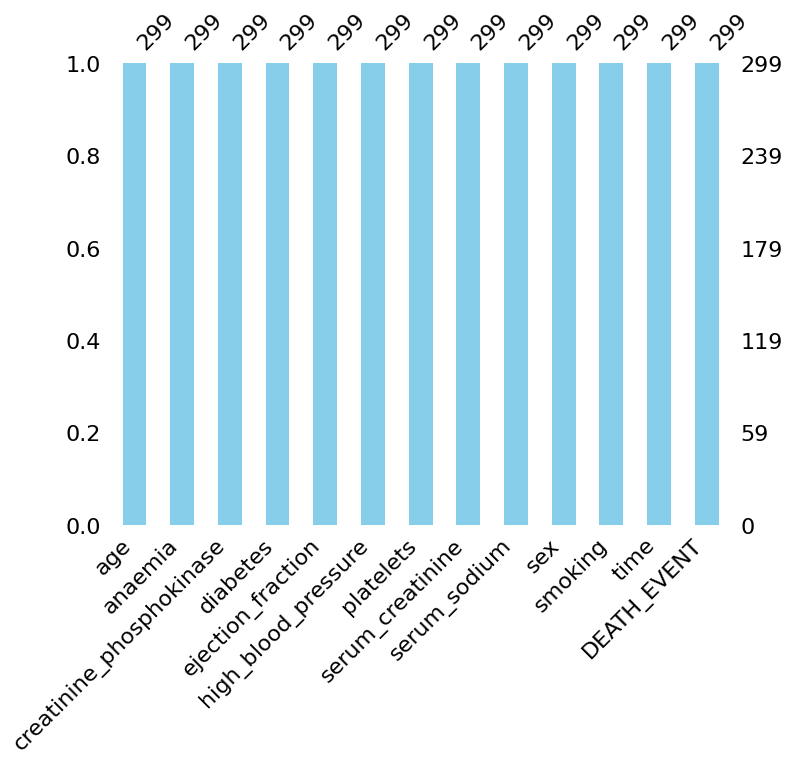

In [44]:
import missingno as msno
msno.bar(heart, figsize=(8,6), color='skyblue')
plt.show()

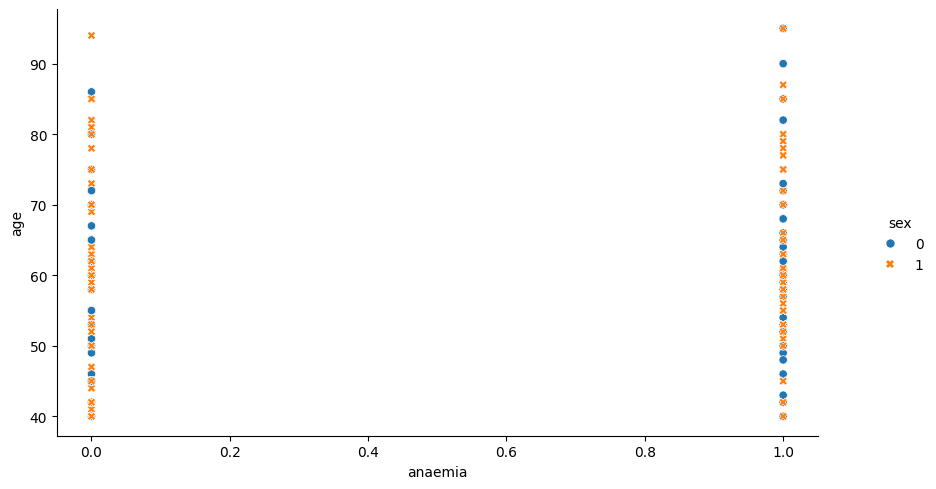

In [45]:
g = sns.relplot(x='anaemia', y='age', data=heart, hue='sex', style='sex')
g.fig.set_size_inches(10,5)
plt.show()

In [46]:
numeric_columns = heart.select_dtypes(include = ["float64", "int64"]).columns
correlation_matrix = heart[numeric_columns].corr()

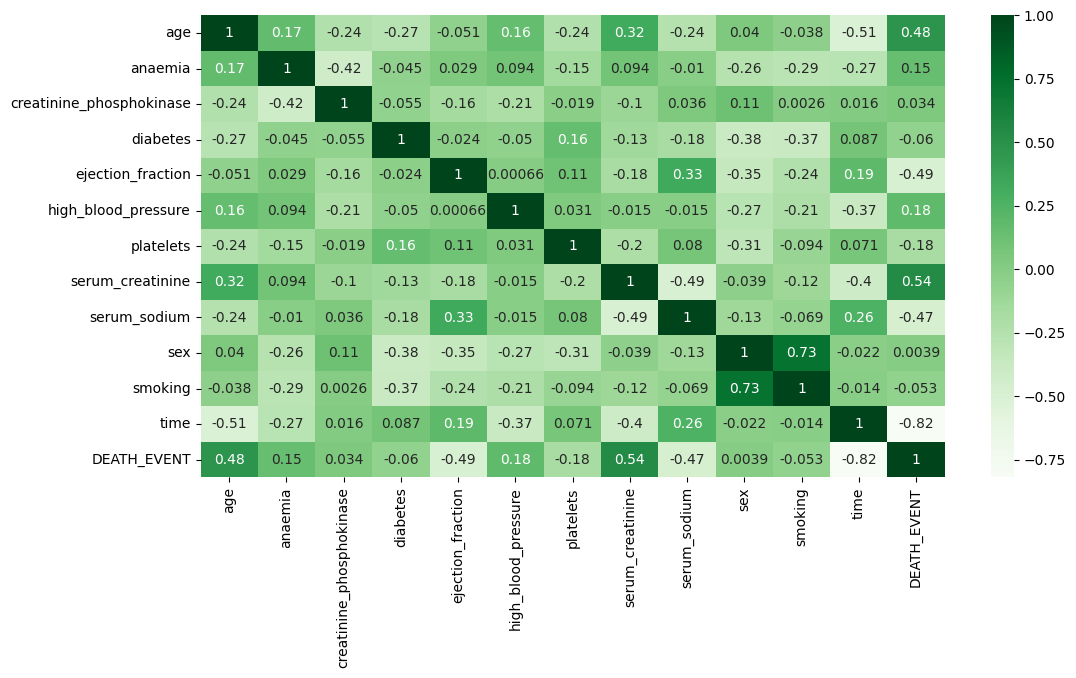

In [47]:
plt.figure(figsize = (12,6))
sns.heatmap(correlation_matrix.corr(), annot = True, cmap = "Greens")
plt.show()

In [48]:
x = heart.drop(['DEATH_EVENT','high_blood_pressure', 'creatinine_phosphokinase', 'diabetes', 'platelets', 'serum_sodium', 'sex', 'smoking'], axis = 1)
y = heart['DEATH_EVENT']

In [49]:
x

,age,anaemia,ejection_fraction,serum_creatinine,time
0,75.0,0,20,1.9,4
1,55.0,0,38,1.1,6
2,65.0,0,20,1.3,7
3,50.0,1,20,1.9,7
4,65.0,1,20,2.7,8
...,...,...,...,...,...
294,62.0,0,38,1.1,270
295,55.0,0,38,1.2,271
296,45.0,0,60,0.8,278
297,45.0,0,38,1.4,280


In [50]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

print('The shape of X_train is : {}'.format(x_train.shape))
print('The shape of X_test is : {}'.format(x_test.shape))
print('The shape of y_train is : {}'.format(y_train.shape))
print('The shape of y_test is : {}'.format(y_test.shape))

The shape of X_train is : (239, 5)
The shape of X_test is : (60, 5)
The shape of y_train is : (239,)
The shape of y_test is : (60,)


In [53]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
pred_train = model.predict(x_train)
cm = confusion_matrix(y_train, pred_train)

# Confusion matrix
print('Confusion matrix Naive Bayes\n', cm)
print('')

# Akurasi
print('Akurasi pada saat training: {}' .format(accuracy_score(y_train, pred_train)))

Confusion matrix Naive Bayes
 [[166   0]
 [  0  73]]

Akurasi pada saat training: 1.0


In [55]:
pred_test = model.predict(x_test)

In [56]:
cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average='micro')
recall = recall_score(y_test, pred_test, average='micro')
f1 = f1_score(y_test, pred_test, average='micro')

print('Confusion matrix Decision Tree\n', cm)
print('')
print('Akurasi pada data test: %.3f' %accuracy)
print('precision: %.3f' %precision)
print('recall : %.3f' %recall)
print('f1-score : %.3f' %f1)

Confusion matrix Decision Tree
 [[33  4]
 [ 9 14]]

Akurasi pada data test: 0.783
precision: 0.783
recall : 0.783
f1-score : 0.783
